In [3]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import scipy.stats as stats

input_file = "traces.csv"
plaintext_file = "input_plaintext.txt"
ciphertext_file = "output_ciphertext.txt"

In [4]:
# Read the CSV file
with open(input_file, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', skipinitialspace=False)
    # Read the data into memory
    data = []
    for row in reader:
        # convert row to ints
        row = [int(i) for i in row]
        data.append(row)

# read the plaintext file
plaintext = []
with open(plaintext_file, 'r') as f:
    plaintext = [line.strip() for line in f]

# read the ciphertext file
ciphertext = []
with open(ciphertext_file, 'r') as f:
    ciphertext = [line.strip() for line in f]

Text(0.5, 0, 'Time')

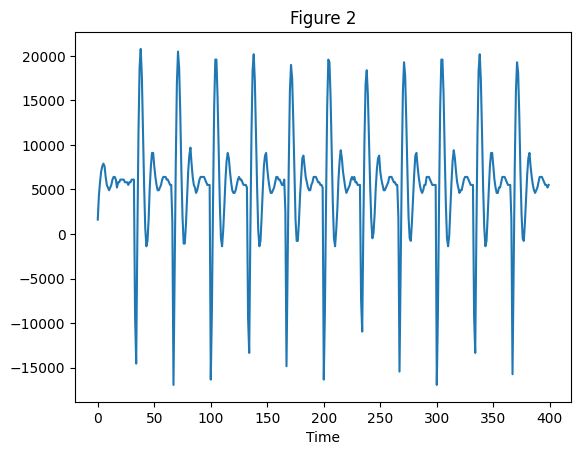

In [45]:
# Question 1

plt.plot(data[0])
plt.title("Figure 2")
plt.xlabel("Time")



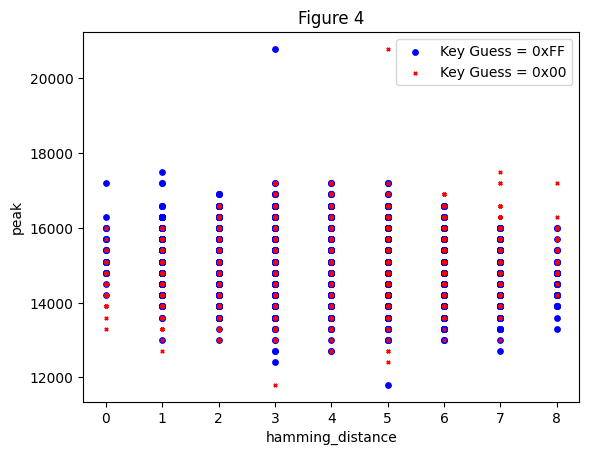

In [42]:
def track_peaks (trace):
    peak_minimum = 10000
    peak_window = 20
    history = []
    peak_indices = []
    found_peak_in_previous_window = False
    cooling_off = False
    max_tuple = (0, 0)
    for i in range(0, len(trace)):
        if len(history) < peak_window - 1:
            history.append(trace[i])
        else:
            history.append(trace[i])

            window_max = (max(history), history.index(max(history)) + i - peak_window + 1)
            peak_high_enough = window_max[0] > peak_minimum
            if window_max[0] < max_tuple[0] and found_peak_in_previous_window:
                peak_indices.append(max_tuple)
                found_peak_in_previous_window = False
                max_tuple = (0, 0)
                cooling_off = True
            elif cooling_off:
                if not peak_high_enough:
                    cooling_off = False
            elif peak_high_enough:
                max_tuple = window_max
                found_peak_in_previous_window = True

            # print(i, trace[i], window_max, max_tuple, found_peak_in_previous_window)
            history.pop(0)

    return peak_indices

def hamming_distance(a, b):
    return bin(a ^ b).count("1")

def dpa_find_byte(byte_index: int):
    all_peaks = [track_peaks(data[i]) for i in range(0, len(data))]
    dpa = np.zeros((len(data), 256))
    dpa_x = []
    dpa_y = []
    for entry in range(0, len(data)):
        for key_byte_guess in range(256):
            plaintext_byte = int(plaintext[entry][byte_index * 2 : byte_index * 2 + 2], 16)
            output_guess = key_byte_guess ^ plaintext_byte
            hamming_distance_value = hamming_distance(0, output_guess)
            dpa[entry][key_byte_guess] = hamming_distance_value

    dpa_y = [all_peaks[i][0][0] for i in range(0, len(all_peaks))]
    r_values = []
    r_evolution = []
    for key_guess in range(256):
        dpa_x = [dpa[i][key_guess] for i in range(0, len(dpa))]
        r = stats.pearsonr(dpa_x, dpa_y)[0]
        r_values.append(r)

    max_r = max(r_values)
    best_key_guess = r_values.index(max_r)
    
    # still question 2, last part
    dpa_0 = [dpa[i][0] for i in range(0, len(dpa))]
    dpa_255 = [dpa[i][255] for i in range(0, len(dpa))]
    # plot both on same plot
    plt.scatter(dpa_255, dpa_y, s=15, c='b', marker='o')
    plt.scatter(dpa_0, dpa_y, s=5, c='r', marker='x')
    plt.legend(["Key Guess = 0xFF", "Key Guess = 0x00"])
    plt.xlabel("hamming_distance")
    plt.ylabel("peak")
    plt.title("Figure 4")

    return best_key_guess, max_r, r_values

best_key_guess, max_r, r_values = dpa_find_byte(0)

# plot the r values
# plt.plot(r_values)
# plt.xlabel("Key Guess")
# plt.ylabel("Correlation Coefficient")
# plt.title("Figure 3")

In [46]:
# Question 2 Figure 3
dpa = np.zeros((len(data), 256))
dpa_x = []
dpa_y = []
for entry in range(0, len(data)):
    for key_byte_guess in range(256):
        plaintext_byte = int(plaintext[entry][0 : 2], 16)
        output_guess = key_byte_guess ^ plaintext_byte
        hamming_distance_value = hamming_distance(0, output_guess)
        dpa[entry][key_byte_guess] = hamming_distance_value

r_time_values =  []

for key_guess in range(256):
    dpa_x = [dpa[i][key_guess] for i in range(0, len(dpa))]
    r_times = []
    for point in range(0, len(data[0])):
        dpa_y = [data[i][point] for i in range(0, len(data))]
        r = stats.pearsonr(dpa_x, dpa_y)[0]
        r_times.append(r)
    r_time_values.append(r_times)

Text(0.5, 1.0, 'Figure 3')

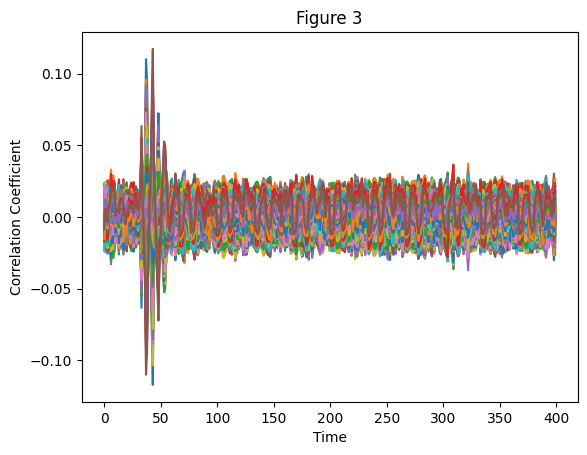

In [47]:
for i in range(0, 256):
    plt.plot(r_time_values[i])
plt.xlabel("Time")
plt.ylabel("Correlation Coefficient")
plt.title("Figure 3")

Text(0.5, 1.0, 'Figure 4')

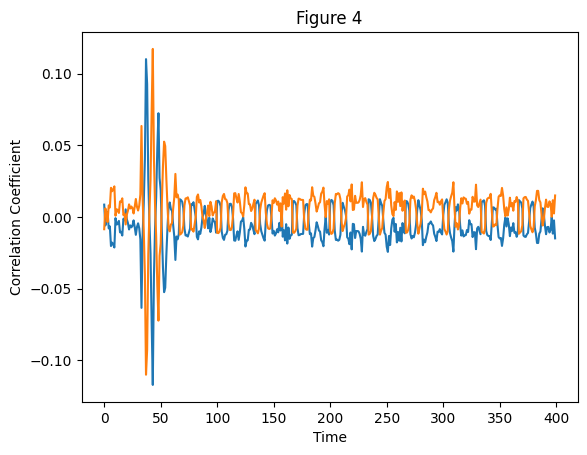

In [48]:
# Question 2 Figure 4
plt.plot(r_time_values[0])
plt.plot(r_time_values[255])
plt.xlabel("Time")
plt.ylabel("Correlation Coefficient")
plt.title("Figure 4")

In [39]:
# Question 4
def dpa_evolution(byte_index: int):
    all_peaks = [track_peaks(data[i]) for i in range(0, len(data))]
    dpa = np.zeros((len(data), 256))
    dpa_x = []
    dpa_y = []
    for entry in range(0, len(data)):
        for key_byte_guess in range(256):
            plaintext_byte = int(plaintext[entry][byte_index * 2 : byte_index * 2 + 2], 16)
            output_guess = key_byte_guess ^ plaintext_byte
            hamming_distance_value = hamming_distance(0, output_guess)
            dpa[entry][key_byte_guess] = hamming_distance_value

    r_evolution = []
    for key_guess in range(256):
        evolution = []
        for num_entries in np.linspace(1000, len(dpa), 1000):
            dpa_x = [dpa[i][key_guess] for i in range(0, int(num_entries))]
            dpa_y = [all_peaks[i][0][0] for i in range(0, int(num_entries))]
            r = stats.pearsonr(dpa_x, dpa_y)[0]
            evolution.append(r)
        r_evolution.append(evolution)

    return r_evolution

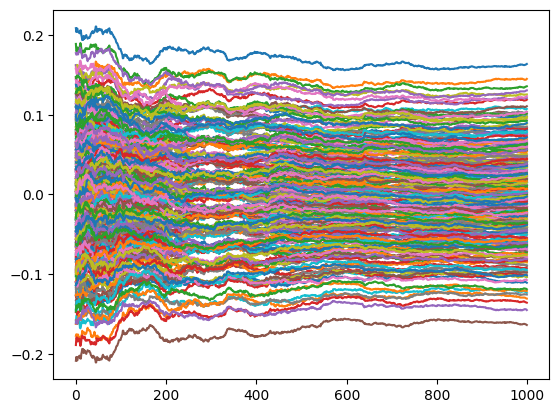

In [40]:
r_evolution = dpa_evolution(0)
for key_guess in range(256):
    plt.plot(r_evolution[key_guess])

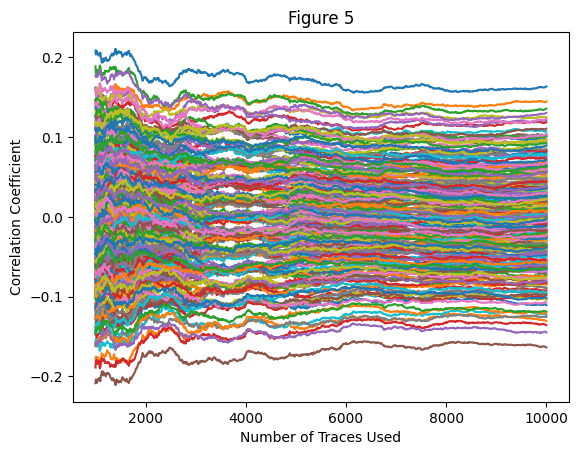

In [44]:
for key_guess in range(256):
    x = np.linspace(1000, 10000, 1000)
    plt.plot(x, r_evolution[key_guess])
    plt.xlabel("Number of Traces Used")
    plt.ylabel("Correlation Coefficient")
    plt.title("Figure 5")

In [11]:
import pyaes

key = "000102030405060708090a0b0c0d0e0f"
key = bytes.fromhex(key)
plaintext_in = plaintext[0]
plaintext_in = bytes.fromhex(plaintext_in)
output_expected = ciphertext[0]

aes = pyaes.AESModeOfOperationECB(key)
ciphertext_out = aes.encrypt(plaintext_in)
print(ciphertext_out)
print(output_expected)

b'\x95\xf8\x84si\xa8W=v\xaf\x98z\xb3\n]\xe2'
95F8847369A8573D76AF987AB30A5DE2
